In [23]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [24]:
#reading the data
df = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')

In [25]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [26]:
#one-hot encoding
data=pd.get_dummies(df)

In [27]:
data.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [28]:
X = data.drop('charges',axis=1)

In [29]:
Y = data['charges']

In [30]:
X.shape,Y.shape


((1338, 11), (1338,))

In [31]:
X.isnull().sum()

age                 0
bmi                 0
children            0
sex_female          0
sex_male            0
smoker_no           0
smoker_yes          0
region_northeast    0
region_northwest    0
region_southeast    0
region_southwest    0
dtype: int64

In [32]:
Y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=12)

In [35]:
len(x_test),len(x_train),len(X)

(268, 1070, 1338)

In [36]:
#building of neural network
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(5),
    tf.keras.layers.Dense(1)
])

#model compile
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.mae,
              metrics=['mae'])


In [37]:
model.fit(x_train,y_train,epochs=100,verbose=1)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 13296.8994 - mae: 13296.8994
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13276.6768 - mae: 13276.6768
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 13249.2158 - mae: 13249.2158
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 13208.4844 - mae: 13208.4844
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 13147.5322 - mae: 13147.5322
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 13058.4346 - mae: 13058.4346
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 12933.6240 - mae: 12933.6240
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 12765.7529 - mae: 12765.7529
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 12546.7510 - mae: 12546.7510
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 12268.04

In [38]:
model.evaluate(x_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 6372.5566 - mae: 6372.5566


[6372.556640625, 6372.556640625]

In [39]:
#building of neural network
tf.random.set_seed(42)

model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(200),
    tf.keras.layers.Dense(150),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(25),
    tf.keras.layers.Dense(5),
    tf.keras.layers.Dense(1)
])

#model compile
model1.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
              loss=tf.keras.losses.mae,
              metrics=['mae'])

In [40]:
history=model1.fit(x_train,y_train,epochs=500)

Epoch 1/500
34/34 [==============================] - 2s 3ms/step - loss: 8517.8916 - mae: 8517.8916
Epoch 2/500
34/34 [==============================] - 0s 3ms/step - loss: 6798.7236 - mae: 6798.7236
Epoch 3/500
34/34 [==============================] - 0s 3ms/step - loss: 5794.1528 - mae: 5794.1528
Epoch 4/500
34/34 [==============================] - 0s 3ms/step - loss: 4477.3628 - mae: 4477.3628
Epoch 5/500
34/34 [==============================] - 0s 4ms/step - loss: 4312.4199 - mae: 4312.4199
Epoch 6/500
34/34 [==============================] - 0s 7ms/step - loss: 4819.9590 - mae: 4819.9590
Epoch 7/500
34/34 [==============================] - 0s 5ms/step - loss: 4461.5122 - mae: 4461.5122
Epoch 8/500
34/34 [==============================] - 0s 6ms/step - loss: 5152.4512 - mae: 5152.4512
Epoch 9/500
34/34 [==============================] - 0s 6ms/step - loss: 3868.7495 - mae: 3868.7495
Epoch 10/500
34/34 [==============================] - 0s 6ms/step - loss: 3867.8406 - mae: 3867.8406

In [41]:
model1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 200)               2400      
                                                                 
 dense_14 (Dense)            (None, 150)               30150     
                                                                 
 dense_15 (Dense)            (None, 100)               15100     
                                                                 
 dense_16 (Dense)            (None, 50)                5050      
                                                                 
 dense_17 (Dense)            (None, 25)                1275      
                                                                 
 dense_18 (Dense)            (None, 5)                 130       
                                                                 
 dense_19 (Dense)            (None, 1)                

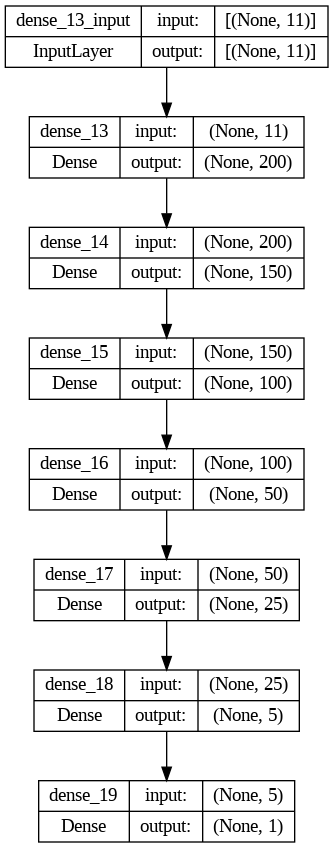

In [42]:
from tensorflow.keras.utils import plot_model
plot_model(model1,show_shapes=True)

In [43]:
model1.evaluate(x_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3573.0610 - mae: 3573.0610


[3573.06103515625, 3573.06103515625]

Text(0.5, 0, 'epochs')

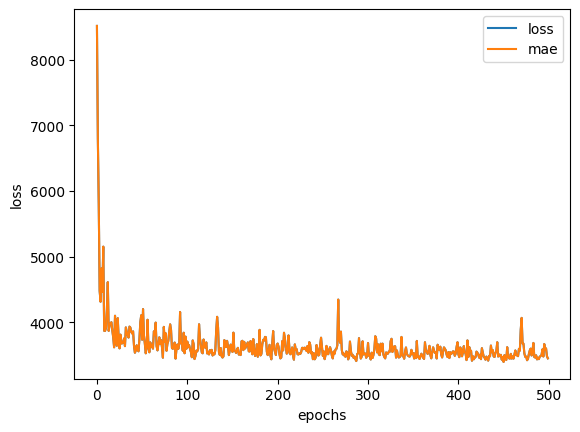

In [44]:
#plot history or we can say training curve
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')